In [1]:
import seaborn as sns
import pandas as pd
from tqdm.auto import tqdm

In [2]:
from sentence_transformers import SentenceTransformer

model_name = 'multi-qa-MiniLM-L6-cos-v1'
model = SentenceTransformer(model_name)

C:\Users\sofia\anaconda3\envs\crypto_llm\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
df_gpt35 = pd.read_csv('data/results-gpt35-crypto.csv')
df_gpt4o = pd.read_csv('data/results-gpt4o-crypto.csv')

In [5]:
results_gpt4o = df_gpt4o.to_dict(orient='records')

In [6]:
record = results_gpt4o[0]

In [7]:
def compute_similarity(record):
    answer_orig = record['answer_orig']
    answer_llm = record['answer_llm']
    
    v_llm = model.encode(answer_llm)
    v_orig = model.encode(answer_orig)
    
    return v_llm.dot(v_orig)

In [8]:
similarity = []

for record in tqdm(results_gpt4o):
    sim = compute_similarity(record)
    similarity.append(sim)

  0%|          | 0/205 [00:00<?, ?it/s]

In [9]:
df_gpt4o['cosine'] = similarity
df_gpt4o['cosine'].describe()

count    205.000000
mean       0.739126
std        0.144457
min        0.247286
25%        0.654272
50%        0.743877
75%        0.849718
max        0.994514
Name: cosine, dtype: float64

### gpt-3.5-turbo

In [14]:
results_gpt35 = df_gpt35.to_dict(orient='records')

similarity_35 = []

for record in tqdm(results_gpt35):
    sim = compute_similarity(record)
    similarity_35.append(sim)

  0%|          | 0/205 [00:00<?, ?it/s]

In [15]:
df_gpt35['cosine'] = similarity_35
df_gpt35['cosine'].describe()

count    205.000000
mean       0.712554
std        0.151091
min        0.162167
25%        0.611088
50%        0.726955
75%        0.832304
max        0.993984
Name: cosine, dtype: float64

In [16]:
import matplotlib.pyplot as plt

C:\Users\sofia\AppData\Local\Temp\ipykernel_21500\4015790799.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt4o['cosine'], label='4o')
C:\Users\sofia\AppData\Local\Temp\ipykernel_21500\4015790799.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt35['cosine'], label='35')


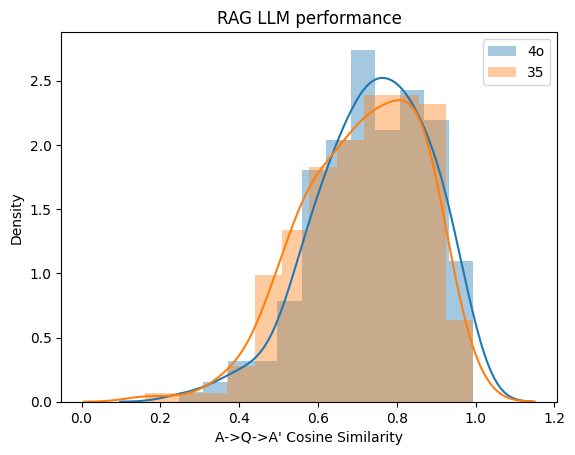

In [17]:
# sns.distplot(df_gpt35['cosine'], label='3.5')

sns.distplot(df_gpt4o['cosine'], label='4o')
sns.distplot(df_gpt35['cosine'], label='35')

plt.title("RAG LLM performance")
plt.xlabel("A->Q->A' Cosine Similarity")
plt.legend()